1. 라이브러리 임포트 및 환경 설정

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# ------------------- 한글 폰트 설정 (환경에 맞게 선택) -------------------
# 사용하는 OS에 맞는 코드의 주석을 해제하여 사용하세요.
# 해당 폰트가 설치되어 있지 않으면, 다른 폰트를 지정하거나 이 부분을 실행하지 마세요.
try:
    # macOS
    # plt.rc('font', family='AppleGothic')
    # Windows
    plt.rc('font', family='Malgun Gothic')
    # Linux (나눔고딕 설치 필요)
    # plt.rc('font', family='NanumGothic')
except:
    print("지정된 한글 폰트가 없어 기본 폰트로 출력됩니다. 일부 글자가 깨질 수 있습니다.")

# 마이너스 기호 깨짐 방지 설정
plt.rc('axes', unicode_minus=False)
# ---------------------------------------------------------------------------

2. 데이터 로드 및 전처리
데이터를 불러오고, 분석에 적합한 형태로 정제(Cleaning) 및 전처리(Preprocessing)를 수행합니다.

In [8]:
def clean_data(df):
    """데이터프레임을 받아 주요 컬럼을 분석에 맞게 전처리합니다."""
    print("데이터 전처리를 시작합니다...")

    # 숫자형 데이터 정리
    df['current_mileage_km'] = pd.to_numeric(df['current_mileage_km'], errors='coerce')
    df['displacement_cc'] = pd.to_numeric(df['displacement_cc'], errors='coerce')

    # 'warranty_remaining_months' 컬럼을 월 단위 숫자로 변환 (예: '2년 6개월' -> 30)
    def convert_warranty_to_months(value):
        if not isinstance(value, str):
            return np.nan

        years = 0
        months = 0

        # '년'과 '개월'을 정규식으로 추출
        year_match = re.search(r'(\d+)년', value)
        if year_match:
            years = int(year_match.group(1))

        month_match = re.search(r'(\d+)개월', value)
        if month_match:
            months = int(month_match.group(1))

        return (years * 12) + months

    if 'warranty_remaining_months' in df.columns:
        # 새로운 컬럼에 변환된 개월 수 저장
        df['warranty_total_months'] = df['warranty_remaining_months'].apply(convert_warranty_to_months)

    print("데이터 전처리가 완료되었습니다.")
    return df

# --- 데이터 로드 및 실행 ---
CSV_FILE_PATH = '../data/car_audio_metadata.csv' # 노트북은 analyzer 폴더 안에 있으므로 상위 폴더로 이동

try:
    raw_df = pd.read_csv(CSV_FILE_PATH)
    df_cleaned = clean_data(raw_df.copy())
    print("\n전처리 후 데이터 상위 5개 샘플:")
    display(df_cleaned.head())
except FileNotFoundError:
    print(f"오류: '{CSV_FILE_PATH}' 파일을 찾을 수 없습니다.")
    print("프로젝트의 최상위 폴더에 파일이 있는지 확인해주세요.")
except Exception as e:
    print(f"데이터 로딩 중 오류 발생: {e}")

데이터 전처리를 시작합니다...
데이터 전처리가 완료되었습니다.

전처리 후 데이터 상위 5개 샘플:


,audio_file_path,data_label,goodsNo,vehicle_name,first_registration_date,year,current_mileage_km,vehicle_type,seating_capacity,fuel_type,...,liens_encumbrances_exist,overall_score,mid_freq_score,low_high_freq,audible_range_score,regularity,irregularity,specific_anomaly,jessino,warranty_total_months
0,vehicle_assets\GJJ250523015159\250613-C02V150-...,NaN,GJJ250523015159,2021 G80 가솔린 2.5 터보 AWD 스탠다드 디자인,2020.06.24,2020,68027,승용,5,가솔린,...,False,4.6,4.0,5.0,5.0,4.0,5.0,True,20251264569,NaN
1,vehicle_assets\GJJ250411013927\250507-C02V150-...,NaN,GJJ250411013927,2021 G80 가솔린 3.5 터보 2WD 스탠다드 디자인,2021.06.02,2021,68092,승용,5,가솔린,...,False,4.4,4.0,4.0,5.0,4.0,5.0,True,20251191028,NaN
2,vehicle_assets\GJP250514014744\250523-C02V150-...,NaN,GJP250514014744,2023 G90 가솔린 3.5 터보 AWD 4인승 시그니처 디자인 셀렉션 카본,2023.04.20,2023,33109,승용,4,가솔린,...,False,4.0,3.0,4.0,5.0,3.0,5.0,True,2025055254,33.0
3,vehicle_assets\GGI250613015626\250623-C02V150-...,NaN,GGI250613015626,2020 G90 가솔린 5.0 AWD 4인승 프레스티지,2020.06.14,2020,69166,승용,4,가솔린,...,False,4.4,4.0,5.0,5.0,4.0,4.0,True,20251298869,NaN
4,vehicle_assets\GJX250418014097\250507-C02V150-...,NaN,GJX250418014097,2021 GV80 가솔린 3.5 터보 AWD 5인승 시그니처 디자인 셀렉션Ⅱ,2021.09.08,2021,94544,SUV,5,가솔린,...,False,4.2,3.0,5.0,5.0,3.0,5.0,True,2025046088,NaN


엔진 소리 분석 점수 분포 시각화 코드
이 코드를 주피터 노트북의 셀에 입력하고 실행하면, 각 소리 관련 점수에 대한 히스토그램이 생성됩니다.

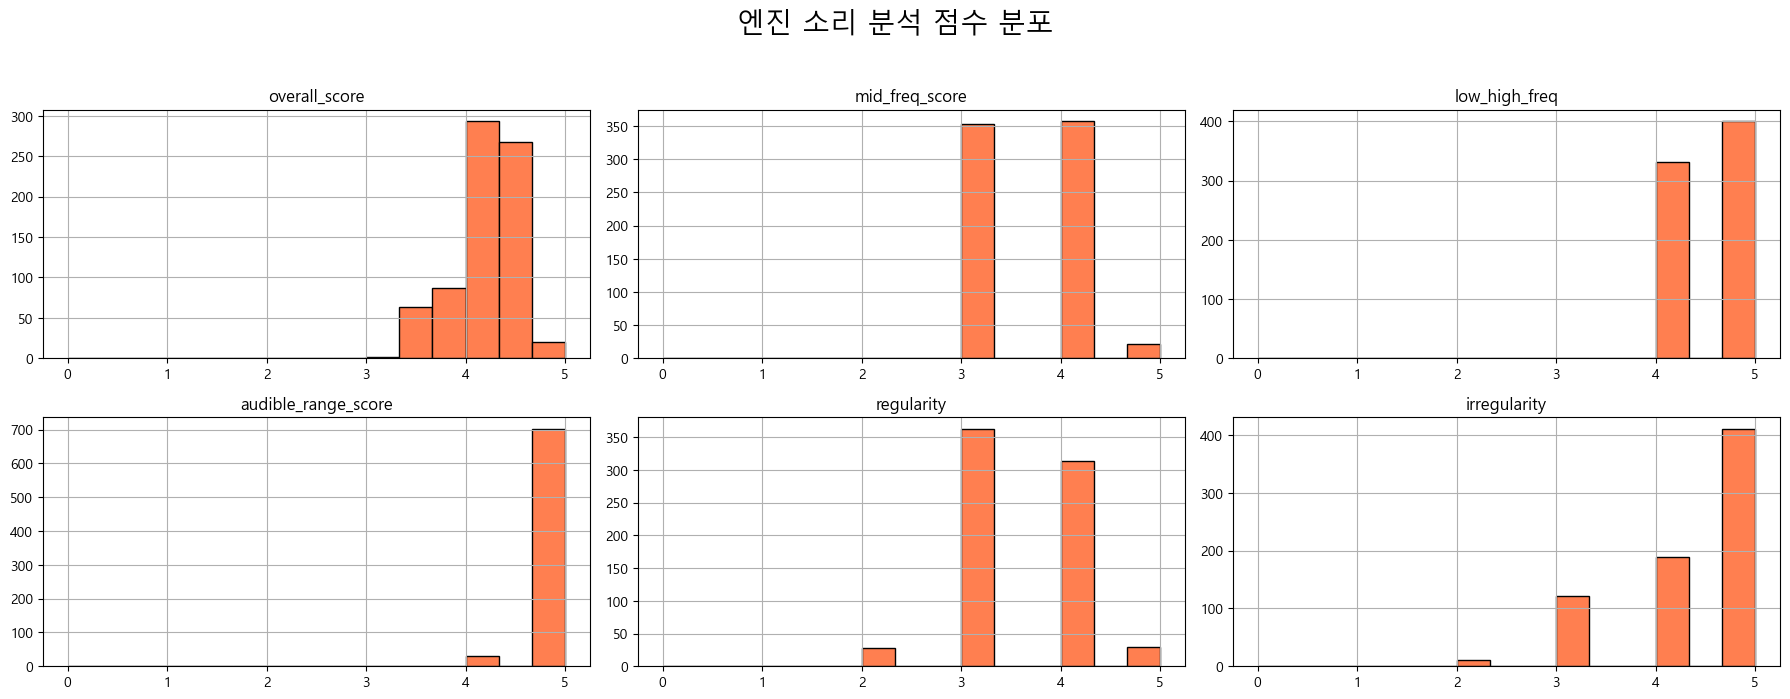

In [9]:
# 시각화할 소리 관련 점수 컬럼 리스트를 최신 버전으로 수정합니다.
score_columns = [
    "overall_score",
    "mid_freq_score",
    "low_high_freq",
    "audible_range_score", # 새로 추가된 컬럼
    "regularity",
    "irregularity",
    "specific_anomaly"
]

# 데이터프레임에 해당 컬럼들이 있는지 먼저 확인합니다.
existing_score_columns = [col for col in score_columns if col in df_cleaned.columns]

if not existing_score_columns:
    print("오류: 데이터에 스코어 관련 컬럼이 없습니다. 컬럼명을 확인해주세요.")
else:
    # 선택된 컬럼들만으로 히스토그램을 그립니다.
    # 그래프 개수(7개)에 맞춰 layout을 3x3으로 조정했습니다.
    df_cleaned[existing_score_columns].hist(bins=15, figsize=(18, 10), layout=(3, 3), color='coral', edgecolor='black')

    # 전체 그래프의 제목을 설정합니다.
    plt.suptitle('엔진 소리 분석 점수 분포', fontsize=20)

    # 그래프들이 겹치지 않도록 레이아웃을 조정합니다.
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # 최종 그래프를 화면에 보여줍니다.
    plt.show()